In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import sklearn

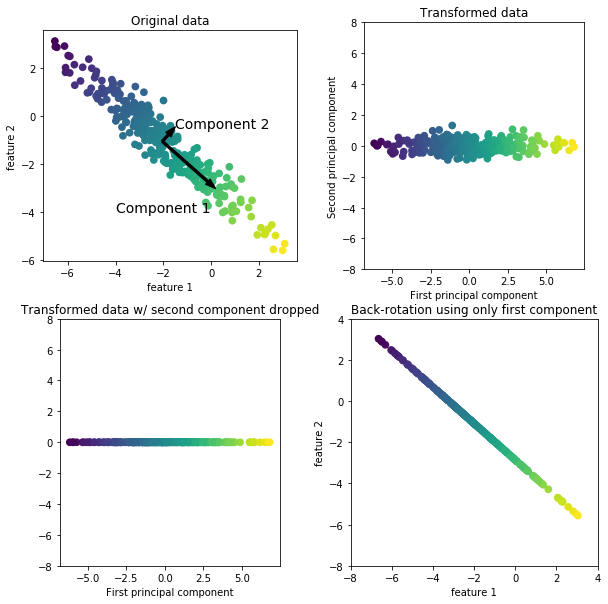

In [2]:
mglearn.plots.plot_pca_illustration()

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.preprocessing import StandardScaler#数据缩放
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scalerd = scaler.transform(cancer.data)
y = cancer.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scalerd,y,random_state=0)
cancer.data.shape

(569, 30)

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
cancer.data_module

'sklearn.datasets.data'

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scalerd)
X_pca = pca.transform(X_scalerd)
#print("两个主成分为: {}".format(pca.components_))
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'Second principal component')

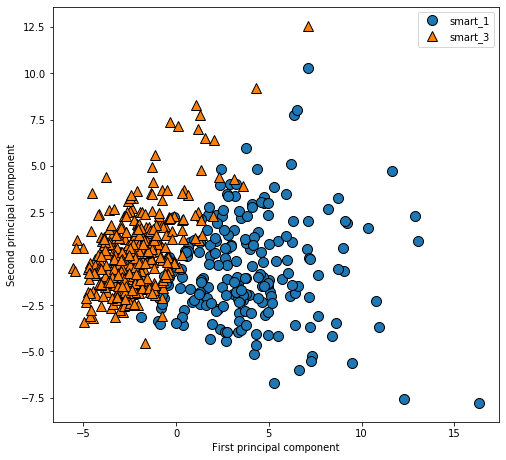

In [4]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(["smart_1","smart_3"],loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [8]:
pca.components_.shape

(2, 30)

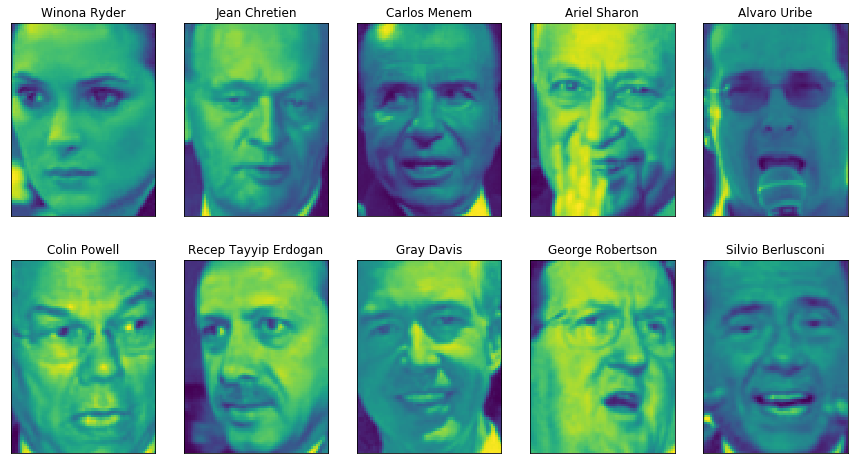

In [12]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape
fix,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [13]:
mask = np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/225.

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train,y_train)
lda.transform(X_train)

array([[ 1.07058498],
       [ 1.72415446],
       [-3.12178225],
       [ 1.20855322],
       [-0.52738917],
       [ 1.4555395 ],
       [ 1.48253341],
       [ 1.52886665],
       [ 1.39757535],
       [ 0.7477694 ],
       [ 0.6090367 ],
       [ 2.60624688],
       [-1.4596621 ],
       [ 0.53020691],
       [-1.34087321],
       [ 1.87258588],
       [-3.86618203],
       [-3.86040064],
       [ 1.63683905],
       [ 1.01319923],
       [-2.30005294],
       [ 2.1107999 ],
       [-2.69771746],
       [-1.45442527],
       [-2.33205038],
       [ 0.42640047],
       [ 1.38125828],
       [ 2.52973777],
       [ 1.9853531 ],
       [ 2.53994124],
       [ 1.00433318],
       [-0.97474569],
       [ 4.07551035],
       [ 2.12928438],
       [ 1.95490977],
       [ 2.06953429],
       [-1.007587  ],
       [-3.79906834],
       [ 1.10040674],
       [ 0.24407873],
       [-1.17707736],
       [ 2.48138274],
       [ 2.28437003],
       [-0.1901543 ],
       [ 1.21646862],
       [-3

In [48]:
#局部线性嵌入
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=2,random_state=0)
lle.fit(X_scalerd)
data= lle.transform(X_scalerd)
data

array([[ 0.04065529,  0.00988207],
       [ 0.05022843,  0.01235009],
       [ 0.05021834,  0.01228488],
       ...,
       [ 0.19357118, -0.00025627],
       [ 0.04281078,  0.01062541],
       [ 0.00312495,  0.00426811]])

In [51]:
#等距特征映射
from sklearn.manifold import Isomap
iso = Isomap(n_components=2,n_neighbors=2)
iso.fit(X_scalerd)
data= iso.transform(X_scalerd)
data

array([[ 23.80624669,   0.54062448],
       [ 11.8847725 ,  -3.53659056],
       [ 19.84840987,  -5.40036329],
       ...,
       [  4.35810715,  -3.33622395],
       [ 23.14474646,  -3.01993066],
       [-15.20494368,   0.43979325]])

In [53]:
#多维尺度分析
from sklearn.manifold import MDS
mds = MDS(n_components=2)
data= mds.fit_transform(X_scalerd)
data

In [59]:
#t-分布随机邻域嵌入
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
data= tsne.fit_transform(X_scalerd)
data

array([[-16.451433,  27.045582],
       [-19.863567,  13.029335],
       [-18.324238,  22.00576 ],
       ...,
       [-14.132556,   7.187357],
       [-18.119951,  25.729225],
       [ 23.321238, -21.977331]], dtype=float32)

In [61]:
X_tsne_data = np.vstack((data.T, y)).T 
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class']) 
df_tsne.head()

,Dim1,Dim2,class
0,-16.451433,27.045582,0.0
1,-19.863567,13.029335,0.0
2,-18.324238,22.005760,0.0
3,-3.098399,23.550369,0.0
4,-24.397196,15.716109,0.0


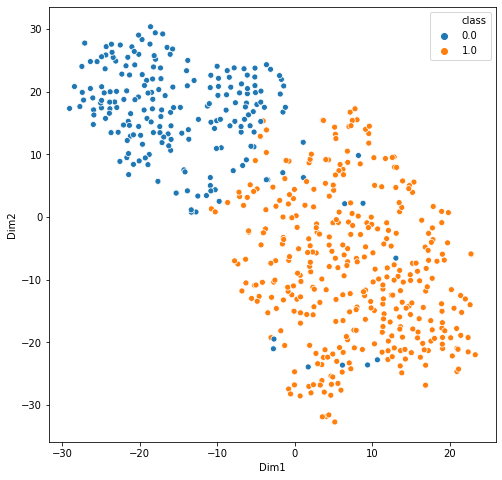

In [64]:
import seaborn as sns
plt.figure(figsize=(8, 8)) 
sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2') 
plt.show()